In [61]:
# (1) 데이터 가져오기

import pandas as pd
import numpy as np

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [62]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼

train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

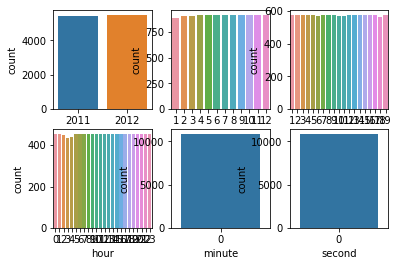

In [63]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3)

sns.countplot(x = 'year', data = train, ax = axes[0, 0])
sns.countplot(x = 'month', data = train, ax = axes[0, 1])
sns.countplot(x = 'day', data = train, ax = axes[0, 2])
sns.countplot(x = 'hour', data = train, ax = axes[1, 0])
sns.countplot(x = 'minute', data = train, ax = axes[1, 1])
sns.countplot(x = 'second', data = train, ax = axes[1, 2])

In [64]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

from sklearn.model_selection import train_test_split

seasons = ['spr', 'sum', 'aut', 'win']
weather = ['best', 'good', 'bad', 'worst']

for i in range(len(seasons)):
    train[seasons[i]] = train['season'] == i+1
    
for j in range(len(weather)):
    train[weather[j]] = train['weather'] == j+1
    
features = list(train.columns)

features.remove('datetime') # datetime에서 연, 월, 일, 시, 분, 초를 분리해줬으므로 삭제.
features.remove('season') # 계절은 원-핫 인코딩을 했으므로 삭제.
features.remove('weather') # 날씨는 원-핫 인코딩을 했으므로 삭제.
features.remove('casual') # 회원 여부는 이용자 수와 관계가 없을 것 같으므로 삭제.
features.remove('registered') # 회원 여부는 이용자 수와 관계가 없을 것 같으므로 삭제.
features.remove('minute') # 시간 단위로 기록된 데이터이므로 삭제.
features.remove('second') # 시간 단위로 기록된 데이터이므로 삭제.
features.remove('count') # target column이므로 삭제.

X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
# (5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

y_pred = model.predict(X_test)
mse = ((y_pred - y_test) ** 2).mean()
rmse = mse ** 0.5
print(f"예측값: {y_pred}\nmse값: {mse}\nrmse값: {rmse}",)

예측값: [177.14196519  81.25832601 397.78675127 ...  70.38943914 302.34801297
 156.95001438]
mse값: 20719.918765956012
rmse값: 143.94415155175986


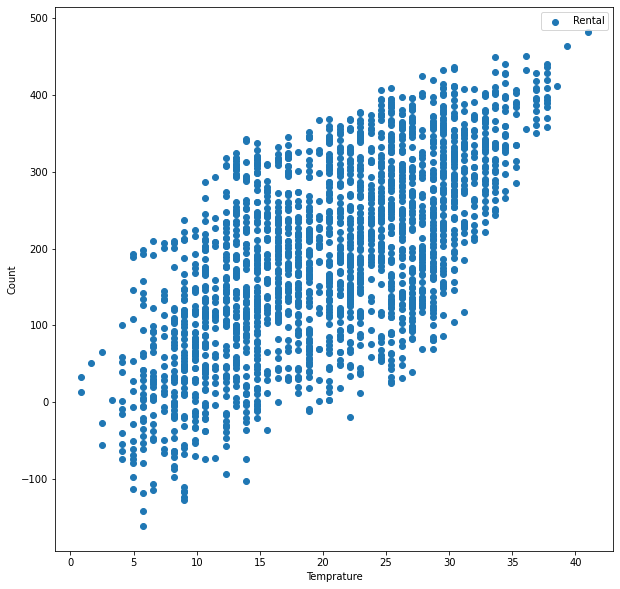

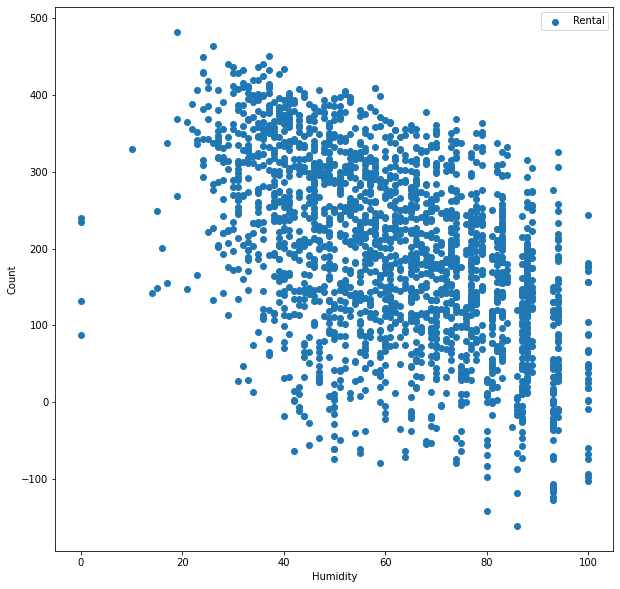

In [59]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

plt.figure(figsize=(10,10))
plt.scatter(X_test["temp"], y_pred, label = 'Rental')
plt.xlabel("Temprature")
plt.ylabel('Count')
plt.legend()
plt.show()


plt.figure(figsize=(10,10))
plt.scatter(X_test["humidity"], y_pred, label = 'Rental')
plt.xlabel("Humidity")
plt.ylabel('Count')
plt.legend()
plt.show()